In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Data Loading

In [60]:
customer_churn = pd.read_csv('Customer-Churn.csv')

##EDA

In [61]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##A) Data Manipulation:

In [63]:

# a. Find the total number of male customers
# b. Find the total number of customers whose Internet Service is ‘DSL’
# c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
# result in ‘new_customer’
# d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
# than 500$ & store the result in ‘new_customer’

# a. Find the total number of male customers
male_customers = len(customer_churn[customer_churn['gender'] == 'Male'])
print(f"Total number of male customers: {male_customers}")



Total number of male customers: 3555


In [64]:
# b. Find the total number of customers whose Internet Service is ‘DSL’
dsl_customers = len(customer_churn[customer_churn['InternetService'] == 'DSL'])
print(f"Total number of customers with DSL internet service: {dsl_customers}")



Total number of customers with DSL internet service: 2421


In [65]:
# c. Extract all the Female senior citizens whose Payment Method is Mailed check
new_customer = customer_churn[(customer_churn['gender'] == 'Female') &
                              (customer_churn['SeniorCitizen'] == 1) &
                              (customer_churn['PaymentMethod'] == 'Mailed check')]
print("Female senior citizens with mailed check payment method:")
print(new_customer)



Female senior citizens with mailed check payment method:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
139   0390-DCFDQ  Female              1     Yes         No       1   
176   2656-FMOKZ  Female              1      No         No      15   
267   3197-ARFOY  Female              1      No         No      19   
451   5760-WRAHC  Female              1      No         No      22   
470   4933-IKULF  Female              1      No         No      17   
694   2682-KEVRP  Female              1      No         No      22   
747   3966-HRMZA  Female              1      No         No       3   
947   9904-EHEVJ  Female              1     Yes        Yes      32   
1029  4184-TJFAN  Female              1     Yes        Yes       3   
1112  2176-LVPNX  Female              1      No         No      71   
1513  0661-XEYAN  Female              1      No         No       1   
1811  2070-XYMFH  Female              1      No         No      23   
1831  3402-XRIUO  Female         

In [66]:
# d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$
# Convert 'TotalCharges' column to numeric, handling errors by coercing them to NaN
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')

# Now perform the filtering
new_customer = customer_churn[(customer_churn['tenure'] < 10) | (customer_churn['TotalCharges'] < 500)]
print("\nCustomers with tenure less than 10 months or total charges less than $500:")
new_customer.sample(5)


Customers with tenure less than 10 months or total charges less than $500:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4944,3682-YEUWS,Male,0,Yes,Yes,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,24.40,253.90,No
933,4750-ZRXIU,Female,1,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,360.10,Yes
3001,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2713,5996-DAOQL,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
258,4959-JOSRX,Female,0,Yes,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.60,80.55,Yes


 ### Data Visualization:

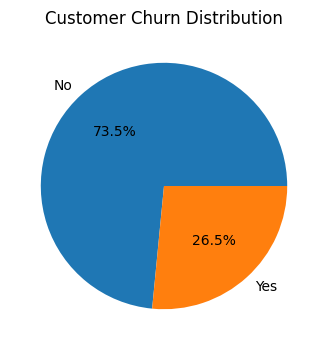

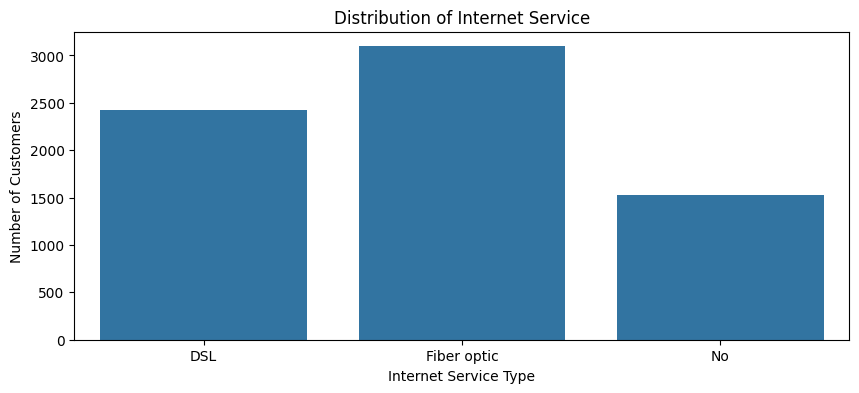

In [67]:

# a. Build a pie-chart to show the distribution of customers would be churning out
# b. Build a bar-plot to show the distribution of ‘Internet Service’

# a. Pie chart for customer churn distribution
plt.figure(figsize=(8, 4))
customer_churn['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Churn Distribution')
plt.ylabel('')  # Hide y-axis label
plt.show()

# b. Bar plot for 'Internet Service' distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='InternetService', data=customer_churn)
plt.title('Distribution of Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

## MODEL BUILDING

In [68]:
# prompt: Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
# ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
# i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
# ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
# iii. Use ‘Adam’ as the optimization algorithm
# iv. Fit the model on the train set, with number of epochs to be 150
# v. Predict the values on the test set and build a confusion matrix
# vi. Plot the ‘Accuracy vs Epochs’ graph

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



# Data preprocessing
# Convert 'Churn' to numerical (Yes/No to 1/0)
customer_churn['Churn'] = customer_churn['Churn'].map({'Yes': 1, 'No': 0})

# Select features and target
X = customer_churn[['tenure']]
y = customer_churn['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the sequential model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(1,))) # Input layer
model.add(Dense(8, activation='relu')) # Hidden layer
model.add(Dense(1, activation='sigmoid')) # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=150, verbose=1,validation_data=(X_test, y_test))

accuracy =pd.DataFrame( history.history['val_accuracy'])
print('Average accuarcy for model 1',accuracy.mean())

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7235 - loss: 0.6483 - val_accuracy: 0.7353 - val_loss: 0.5455
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7377 - loss: 0.5379 - val_accuracy: 0.7353 - val_loss: 0.5080
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7182 - loss: 0.5286 - val_accuracy: 0.7353 - val_loss: 0.5032
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7234 - loss: 0.5279 - val_accuracy: 0.7353 - val_loss: 0.4991
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7377 - loss: 0.5191 - val_accuracy: 0.7346 - val_loss: 0.4977
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7522 - loss: 0.5136 - val_accuracy: 0.7566 - val_loss: 0.4974
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7465 - loss: 0.5169 - val_accuracy: 0.7353 - val_loss: 0.4987
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7405 - loss: 0.5228 - val_accu

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
 [[929 107]
 [239 134]]


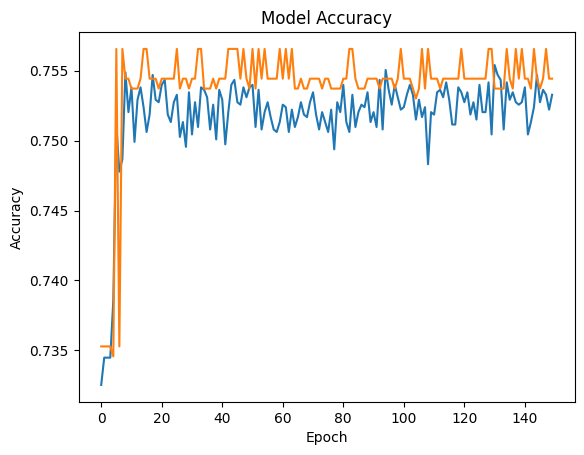

In [69]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Accuracy vs Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

##2nd model

In [71]:
# prompt: Build the 2nd model using same target and feature variables:
# i. Add a drop-out layer after the input layer with drop-out value of 0.3
# ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
# iii. Predict the values on the test set and build a confusion matrix
# iv. Plot the ‘Accuracy vs Epochs’ graph

from tensorflow.keras.layers import Dropout

# Build the second sequential model with dropout layers
model2 = Sequential()
model2.add(Dense(12, activation='relu', input_shape=(1,)))  # Input layer
model2.add(Dropout(0.3))  # Dropout layer after input layer
model2.add(Dense(8, activation='relu'))  # Hidden layer
model2.add(Dropout(0.2)) # Dropout layer after hidden layer
model2.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history2 = model2.fit(X_train, y_train, epochs=150, verbose=1,validation_data=(X_test, y_test))

accuracy =pd.DataFrame( history2.history['val_accuracy'])
print('Average accuarcy for model 2',accuracy.mean())


Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5557 - loss: 0.6785 - val_accuracy: 0.7353 - val_loss: 0.5334
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7370 - loss: 0.5515 - val_accuracy: 0.7353 - val_loss: 0.5100
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.5474 - val_accuracy: 0.7353 - val_loss: 0.5084
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7378 - loss: 0.5367 - val_accuracy: 0.7353 - val_loss: 0.5052
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7377 - loss: 0.5335 - val_accuracy: 0.7353 - val_loss: 0.5043
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7382 - loss: 0.5279 - val_accuracy: 0.7353 - val_loss: 0.5041
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.5248 - val_accuracy: 0.7353 - val_loss: 0.5042
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7393 - loss: 0.5240 - val_acc

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix for the second model:
 [[1036    0]
 [ 373    0]]


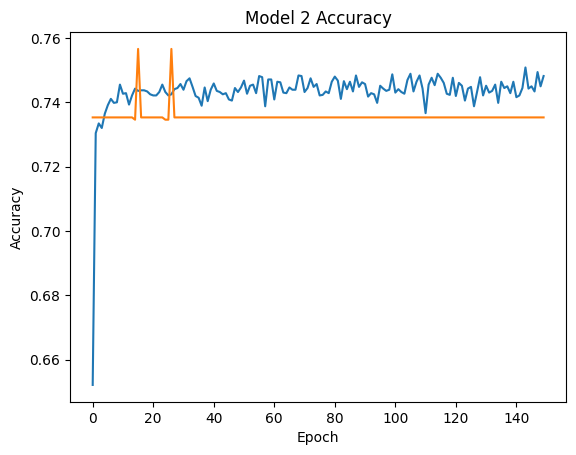

Average Accuracy for model2 0    0.743219
dtype: float64


In [72]:
# Predict on the test set
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

# Confusion matrix for the second model
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix for the second model:\n", cm2)

# Plot Accuracy vs Epochs for the second model
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

accuracy =pd.DataFrame( history2.history['accuracy'])
print('Average Accuracy for model2',accuracy.mean())

###3rd model

In [73]:
# Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
# ‘Churn’ as the dependent/target column:
# i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
# ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
# iii. Use ‘Adam’ as the optimization algorithm
# iv. Fit the model on the train set, with number of epochs to be 150
# v. Predict the values on the test set and build a confusion matrix
# vi. Plot the ‘Accuracy vs Epochs’ graph


# Select features and target
X = customer_churn[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = customer_churn['Churn']

# Convert 'TotalCharges' to numeric if not already done
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X.dropna(inplace=True) # drop rows with NaN values
y = y[X.index]


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the third sequential model
model3 = Sequential()
model3.add(Dense(12, activation='relu', input_shape=(3,)))  # Input layer with 12 nodes
model3.add(Dense(8, activation='relu'))  # Hidden layer with 8 nodes
model3.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history3 = model3.fit(X_train, y_train, epochs=150, verbose=1,validation_data=(X_test, y_test))

accuracy =pd.DataFrame( history3.history['val_accuracy'])
print('Average Accuracy for model3',accuracy.mean())


Epoch 1/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6883 - loss: 0.6068 - val_accuracy: 0.7740 - val_loss: 0.5420
Epoch 2/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7824 - loss: 0.5142 - val_accuracy: 0.7733 - val_loss: 0.4766
Epoch 3/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.4718 - val_accuracy: 0.7690 - val_loss: 0.4660
Epoch 4/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7773 - loss: 0.4612 - val_accuracy: 0.7747 - val_loss: 0.4641
Epoch 5/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.4669 - val_accuracy: 0.7704 - val_loss: 0.4621
Epoch 6/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7808 - loss: 0.4488 - val_accuracy: 0.7747 - val_loss: 0.4617
Epoch 7/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7802 - loss: 0.4493 - val_accuracy: 0.7754 - val_loss: 0.4611
Epoch 8/150
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 0.4431 - val_acc

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix for the third model:
 [[932 101]
 [200 174]]


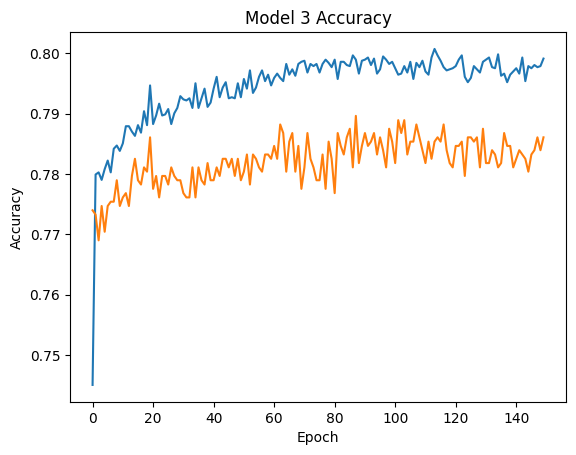

In [74]:


# Predict on the test set
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)

# Confusion matrix for the third model
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix for the third model:\n", cm3)

# Plot Accuracy vs Epochs for the third model
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

